### Question 2 ANALYSIS 2 : (55 points)


> Use NYT API to collect NYT data. Perform 3 analysis on the collected data.

Link to NYT developer docs : [NYT API Documentation](http://developer.nytimes.com/)


| Code                 | Points           | 
| -------------        |:-------------:   | 
| Collect Data         | **10** Points    | 
| Storing Data         | **15** Points    |   
| Individual Analysis  | **10** Points    |  

#### Instructions :
- You would need to create an API key.
- Use `request` or `beautiful-soap` library to download the data. (No other library or crawler allowed).
- Store the data in your local machine.
- Your analysis should use **this downloaded data only** (and not try to redownload this data again during analysis time).
- There is a rate limit for downloading the data. I would suggest you to start collecting the data from day 1. You can try  
  using multiple account to get more than 1 key.
- You need to use atleast 2 API method eg: `archive`, `Article Search`. **Do not use** `Movies Review`, `Semantic` API.

# General Instructions :

- You need to submit a `runnable ipython notebook`. TA should be able to clone your repository and run the code in their 
  machine. (They will install any libraries you have as well as set-up any environment variable and file argument that you have  
  need.) But there should be no code change required to run the notebook.
- You are allowed to use any python libraries except **Numpy,Pandas,automated crawler tools**. You can use a library for  
  crawling (if you think you need it but it should not be an automated click to run types.)
- Do not share/upload any keys on Github. You should store them as environment variable.
```sh
$ export nyt_archive_key = abcd1234
```
```python
import os
nyt_archive_key = os.get_env('nyt_archive_key')
```
- You can only use excel, matplotlib, seaborn to create plots (**optional to create plots**).
- Following folder/file structure is preferred


| Path                                | Purpose                                                                         | 
| ------------------------------------|---------------------------------------------------------------------------------| 
|`midterm/`                           | folder to store all your midterm submission files                               | 
| `midterm/data/*`                    | Store all raw data                                                              |   
| `midterm/que[1-2]/ana_[1-3].ipynb`  | Notebook to store the code for analysis                                         |
| `midterm/que[1-2]/ana_[1-3]/`       | Extra files required/generated for each analysis (Eg. output.csv,plot.png)      |
| `midterm/readme.md`                 | Markdown report                                                                 |

-  The TA will only look for a folder `midterm` in your repository and all the required files should be available inside it. 
   You may lose points if the files are kept in some other location.
-  Using **NLTK** in your analysis will carry higher points. Just using it for the sake of it does not constitute as NLTK usage.
-  Since this is mid-term, **no extension of deadline is available**. You lose 5 point for every 4 hours delay.
   Eg : `You submit it at 12:01 AM or 3:01 AM , you will lose 5 points. 
   You submit it at 4:01 AM you lose 10 points`
-  Please use **Markdown syntax in your ipynb notebook** so the TA understands what you are trying to do. 
-  You will need to create a final report stating what analysis you have done and its output. It needs to be created as a        
   markdown document as named `readme.md`. This is important and failing to do so will result in large loss of marks. 
   **`No Prezi,ppt,pdf allowed`**. 
   Imagine if I was to go through only this document (and no other file), I should be able to understand what data you had, how    you obtained it, how is it stored, what analysis have you done, what information did you get etc etc.



In [1]:
import requests,json,os
import re,datetime
import matplotlib.pyplot as mp

In [6]:
Colg_Univ=dict.fromkeys(range(2012,2017),0)
C_Internet=dict.fromkeys(range(2012,2017),0)
Movies=dict.fromkeys(range(2012,2017),0)
Med_Health=dict.fromkeys(range(2012,2017),0)


In [7]:
for folder in range(2012,2017):
        jpath ='Archive/'+str(folder)
        
        for root, dirs, files in os.walk(jpath):
        
            for f in files:
                if f.endswith('.json'):
    
                    with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
         
                        artdata=json.load(json_file)
                   
                        match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                        date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                    
                    for i in range(0,len(artdata['keywords'])):
                        if 'subject' in artdata['keywords'][i]['name']:
                            if 'Colleges and Universities' in artdata['keywords'][i]['value']:
                                Colg_Univ[date.year]+=1
                            if 'Computers and the Internet' in artdata['keywords'][i]['value']:
                                C_Internet[date.year]+=1
                            if 'Movies' in artdata['keywords'][i]['value']:
                                Movies[date.year]+=1
                            if 'Medicine and Health' in artdata['keywords'][i]['value']:
                                Med_Health[date.year]+=1
                            

In [10]:
x=[]
mov=[]
cu=[]
ci=[]
mh=[]

for a in sorted(Movies):
    x.append(a)
    mov.append(Movies[a])
for a in sorted(Colg_Univ):
    cu.append(Colg_Univ[a])
for a in sorted(C_Internet):
    ci.append(C_Internet[a])
for a in sorted(Med_Health):
    mh.append(Med_Health[a])


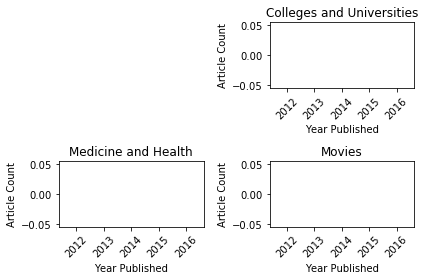

In [15]:
mp.subplot(224)
mp.bar(range(len(Movies)),mov,color='gold',align='center')
mp.xticks(range(len(Movies)),x,rotation=45)
mp.title('Movies')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(C_Internet)),ci,color='gold',align='center')
mp.xticks(range(len(C_Internet)),x,rotation=45)
mp.title('Computers and the Internet')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(223)
mp.bar(range(len(Med_Health)),ci,color='plum',align='center')
mp.xticks(range(len(Med_Health)),x,rotation=45)
mp.title('Medicine and Health')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.subplot(222)
mp.bar(range(len(Colg_Univ)),cu,color='plum',align='center')
mp.xticks(range(len(Colg_Univ)),x,rotation=45)
mp.title('Colleges and Universities')
mp.ylabel('Article Count')
mp.xlabel('Year Published')

mp.tight_layout()
mp.show()


